![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Here you run your code to explore the data
df_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t', index_col=0)
df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t', encoding= 'unicode_escape')

In [113]:
# Create your connection.
cnx = sqlite3.connect('zippedData/im.db')

df_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", cnx)
df_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", cnx)
df_movie_persons = pd.read_sql_query("SELECT * FROM persons", cnx)
df_known_for = pd.read_sql_query("SELECT * FROM known_for", cnx)
df_directors = pd.read_sql_query("SELECT * FROM directors", cnx)
df_principals = pd.read_sql_query("SELECT * FROM principals", cnx)

In [118]:
df_movie_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
conn = sqlite3.connect('zippedData\im.db')

basics_and_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    """, conn )

people = pd.read_sql("""
SELECT *
FROM directors
LEFT JOIN persons
    ON directors.person_id = persons.person_id
LEFT JOIN movie_basics
    ON directors.movie_id = movie_basics.movie_id
    """, conn )

In [6]:
basics_and_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0


In [7]:
df_movie_gross.rename(columns={'title':'movie'}, inplace=True)

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
df_movie_gross.loc[1872, 'foreign_gross'] = '1131561399'
df_movie_gross.loc[3079, 'foreign_gross'] = '1369544272'
df_movie_gross.loc[1873, 'foreign_gross'] = '1018130012'
df_movie_gross.loc[2760, 'foreign_gross'] = '1009996733'
df_movie_gross.loc[1874, 'foreign_gross'] = '1162040651'

df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].astype(float)

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [9]:
df_movie_gross['total_gross'] = df_movie_gross['domestic_gross'] + df_movie_gross['foreign_gross']

# df_movie_gross_25 = df_movie_gross.sort_values(by=['total_gross'], ascending=False).head(25)

df_top_gross_studios = df_movie_gross.sort_values(by=['total_gross'], ascending=False).head(25).groupby('studio').sum()
df_top_gross_studios = df_top_gross_studios.sort_values(by=['total_gross'], ascending=False)

df_top_gross_studios.reset_index(inplace=True)

In [10]:
df_top_gross_studios.head(10)

,studio,domestic_gross,foreign_gross,year,total_gross
0,BV,7.536900e+09,1.150321e+10,28209,1.904011e+10
1,Uni.,1.985000e+09,4.905367e+09,10080,6.890367e+09
2,WB,1.164200e+09,2.410000e+09,6041,3.574200e+09
3,P/DW,3.524000e+08,7.714000e+08,2011,1.123800e+09
4,Sony,3.044000e+08,8.042000e+08,2012,1.108600e+09
5,Par.,2.454000e+08,8.586000e+08,2014,1.104000e+09


In [11]:
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_movie_budgets['domestic_gross'] = df_movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# df_movie_budgets.sort_values(by=['worldwide_gross'], ascending=False).head(25)

In [12]:
df_budget_gross = pd.merge(df_movie_gross, df_movie_budgets, on = 'movie', how = 'left')

In [13]:
df_budget_gross = df_budget_gross[df_budget_gross['worldwide_gross'].notna()]

df_budget_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 3290
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   foreign_gross      1086 non-null   float64
 4   year               1247 non-null   int64  
 5   total_gross        1084 non-null   float64
 6   id                 1247 non-null   float64
 7   release_date       1247 non-null   object 
 8   production_budget  1247 non-null   float64
 9   domestic_gross_y   1247 non-null   float64
 10  worldwide_gross    1247 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 116.9+ KB


In [14]:
df_budget_gross = df_budget_gross.drop(df_budget_gross.columns[[2, 3, 4, 5, 6]], axis=1)

In [88]:
df_budget_gross['gross_budget_ratio'] = df_budget_gross['worldwide_gross'] / df_budget_gross['production_budget']

df_top_ratio = df_budget_gross[df_budget_gross['worldwide_gross'] > 750000000].sort_values(by=['gross_budget_ratio'], ascending=False).head(10)

df_top_ratio.rename(columns={'domestic_gross_y':'domestic_gross'}, inplace=True)

In [90]:
df_top_ratio.reset_index(drop=True)

,movie,studio,release_date,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
0,Bohemian Rhapsody,Fox,"Nov 2, 2018",55000000.0,216303339.0,8.949853e+08,16.272461
1,Minions,Uni.,"Jul 10, 2015",74000000.0,336045770.0,1.160336e+09,15.680219
2,Deadpool,Fox,"Feb 12, 2016",58000000.0,363070709.0,8.010256e+08,13.810786
3,Despicable Me 3,Uni.,"Jun 30, 2017",75000000.0,264624300.0,1.034728e+09,13.796370
4,Despicable Me 2,Uni.,"Jul 3, 2013",76000000.0,368065385.0,9.752168e+08,12.831800
5,The Secret Life of Pets,Uni.,"Jul 8, 2016",75000000.0,368384330.0,8.867505e+08,11.823340
6,Jumanji: Welcome to the Jungle,Sony,"Dec 20, 2017",90000000.0,404508916.0,9.644962e+08,10.716624
7,Ice Age: Continental Drift,Fox,"Jul 13, 2012",95000000.0,161321843.0,8.797651e+08,9.260686
8,Frozen,BV,"Nov 22, 2013",150000000.0,400738009.0,1.272470e+09,8.483133
9,Furious 7,Uni.,"Apr 3, 2015",190000000.0,353007020.0,1.518723e+09,7.993278


In [17]:
df_top_ratio.reset_index(drop=True, inplace=True)

In [91]:
df_top_ratio.head(10)

,movie,studio,release_date,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
3093,Bohemian Rhapsody,Fox,"Nov 2, 2018",55000000.0,216303339.0,8.949853e+08,16.272461
1882,Minions,Uni.,"Jul 10, 2015",74000000.0,336045770.0,1.160336e+09,15.680219
2338,Deadpool,Fox,"Feb 12, 2016",58000000.0,363070709.0,8.010256e+08,13.810786
2769,Despicable Me 3,Uni.,"Jun 30, 2017",75000000.0,264624300.0,1.034728e+09,13.796370
1132,Despicable Me 2,Uni.,"Jul 3, 2013",76000000.0,368065385.0,9.752168e+08,12.831800
2335,The Secret Life of Pets,Uni.,"Jul 8, 2016",75000000.0,368384330.0,8.867505e+08,11.823340
2770,Jumanji: Welcome to the Jungle,Sony,"Dec 20, 2017",90000000.0,404508916.0,9.644962e+08,10.716624
734,Ice Age: Continental Drift,Fox,"Jul 13, 2012",95000000.0,161321843.0,8.797651e+08,9.260686
1130,Frozen,BV,"Nov 22, 2013",150000000.0,400738009.0,1.272470e+09,8.483133
1880,Furious 7,Uni.,"Apr 3, 2015",190000000.0,353007020.0,1.518723e+09,7.993278


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [37]:
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t', index_col=0)
df_movie_info = df_movie_info[df_movie_info['rating'].notna()]
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1557 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.0+ KB


In [53]:
mpaa_ratings = df_movie_info[df_movie_info['box_office'].notna()]

mpaa_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      340 non-null    object
 1   rating        340 non-null    object
 2   genre         340 non-null    object
 3   director      299 non-null    object
 4   writer        273 non-null    object
 5   theater_date  334 non-null    object
 6   dvd_date      334 non-null    object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       338 non-null    object
 10  studio        305 non-null    object
dtypes: object(11)
memory usage: 31.9+ KB


In [56]:
mpaa_ratings.sort_values(by='box_office', ascending=False).head(10)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004","Aug 31, 2004",$,368000000.0,127 minutes,Newmarket Film Group
1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012","Mar 19, 2013",$,303001229.0,170 minutes,Warner Bros.
1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012","Mar 11, 2013",$,299300000.0,145 minutes,MGM
883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004","Apr 26, 2005",$,279167575.0,118 minutes,Universal Pictures
1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892.0,161 minutes,Warner Bros. Pictures
1255,Mission: Impossible III director and Alias cre...,PG-13,Action and Adventure|Drama|Science Fiction and...,NaN,Gene Roddenberry|Alex Kurtzman|Roberto Orci,"May 7, 2009","Nov 17, 2009",$,257704099.0,127 minutes,IMAX
661,One woman's rocky road to the altar gets playe...,PG,Comedy|Romance,Joel Zwick,Nia Vardalos,"Apr 19, 2002","Feb 11, 2003",$,241250669.0,95 minutes,IFC Films
841,This is a contemporary retelling of H.G. Wells...,PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Josh Friedman|David Koepp,"Jun 29, 2005","Nov 22, 2005",$,234141872.0,117 minutes,Paramount Pictures
1877,A hard-drinking lush finds himself thrust into...,PG-13,Action and Adventure|Comedy|Drama,Peter Berg,Vincent Gilligan|Vince Gilligan|Vy Vincent Ngo,"Jun 16, 2008","Nov 25, 2008",$,227946274.0,92 minutes,Columbia Pictures


In [57]:
mpaa_ratings = mpaa_ratings.sort_values(by=['box_office']).groupby('rating').mean()

In [58]:
mpaa_ratings.reset_index(drop=False, inplace=True)

mpaa_ratings.head(10)

,rating,box_office
0,G,3.044796e+07
1,NC17,1.260219e+06
2,NR,2.486249e+06
3,PG,5.103356e+07
4,PG-13,5.652015e+07
5,R,2.323176e+07


In [61]:
mpaa_ratings = mpaa_ratings.sort_values(by='box_office', ascending=False)
mpaa_ratings.head(10)

,rating,box_office
4,PG-13,5.652015e+07
3,PG,5.103356e+07
0,G,3.044796e+07
5,R,2.323176e+07
2,NR,2.486249e+06
1,NC17,1.260219e+06


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

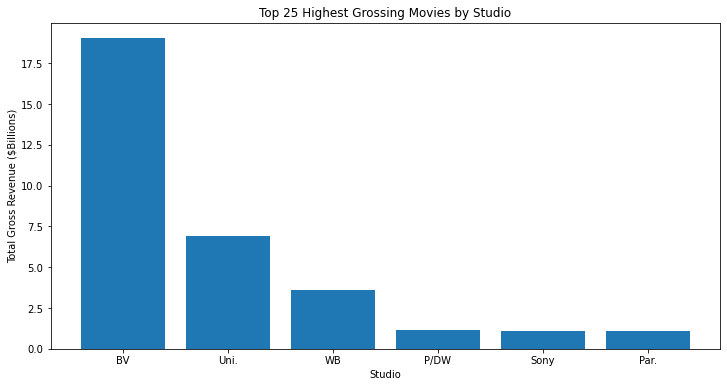

In [62]:
# Here you run your code to model the data
fig, ax = plt.subplots(figsize=(12, 6))


ax.bar(df_top_gross_studios['studio'], df_top_gross_studios['total_gross']/1000000000)
ax.set_title('Top 25 Highest Grossing Movies by Studio')
ax.set_xlabel('Studio');
ax.set_ylabel('Total Gross Revenue ($Billions)');
#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

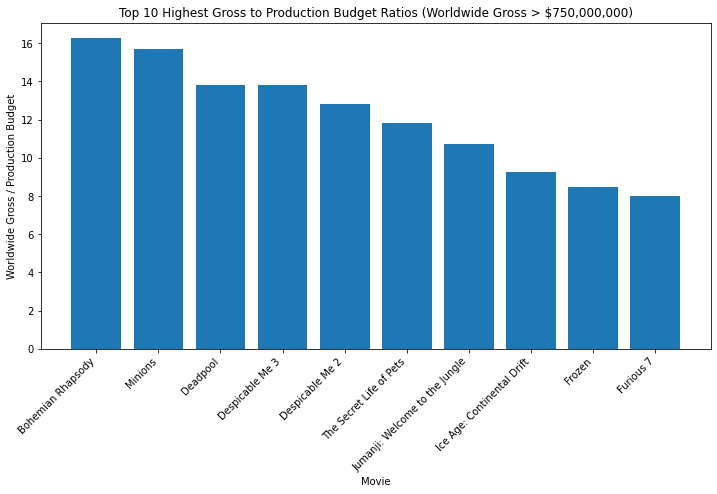

In [95]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.bar(df_top_ratio['movie'], df_top_ratio['gross_budget_ratio'])
ax.set_title('Top 10 Highest Gross to Production Budget Ratios (Worldwide Gross > $750,000,000)')
ax.set_xlabel('Movie');
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Worldwide Gross / Production Budget');

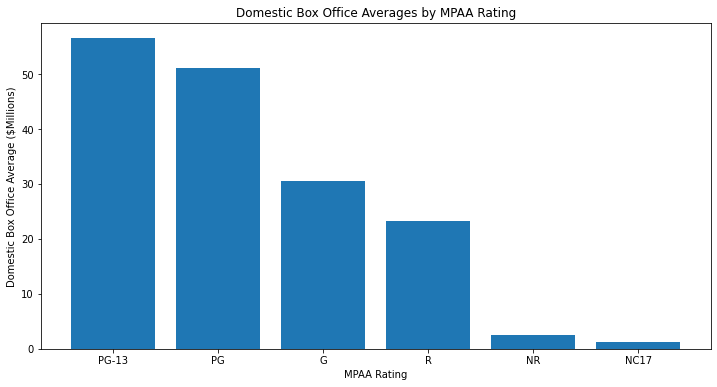

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(mpaa_ratings['rating'], mpaa_ratings['box_office']/1000000)
ax.set_title('Domestic Box Office Averages by MPAA Rating')
ax.set_xlabel('MPAA Rating');
ax.set_ylabel('Domestic Box Office Average ($Millions)');
#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

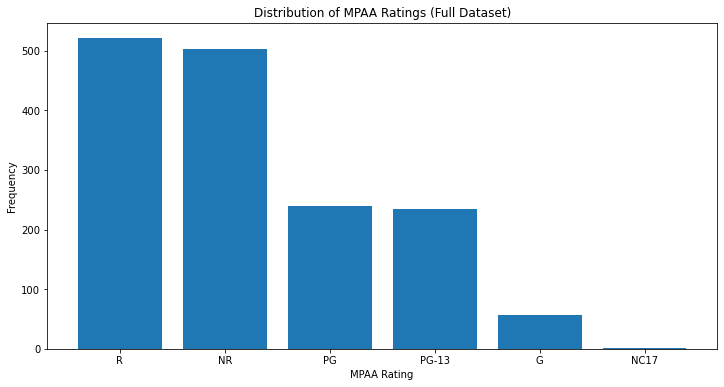

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(df_movie_info['rating'].value_counts().index, df_movie_info['rating'].value_counts().values)
ax.set_title('Distribution of MPAA Ratings (Full Dataset)')
ax.set_xlabel('MPAA Rating')
ax.set_ylabel('Frequency');

In [69]:
mpaa_ratings_bo = df_movie_info[df_movie_info['box_office'].notna()]

mpaa_ratings_bo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      340 non-null    object
 1   rating        340 non-null    object
 2   genre         340 non-null    object
 3   director      299 non-null    object
 4   writer        273 non-null    object
 5   theater_date  334 non-null    object
 6   dvd_date      334 non-null    object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       338 non-null    object
 10  studio        305 non-null    object
dtypes: object(11)
memory usage: 31.9+ KB


In [82]:
mpaa_ratings_bo['rating'].value_counts()

R        142
PG-13    117
PG        52
NR        19
G          9
NC17       1
Name: rating, dtype: int64

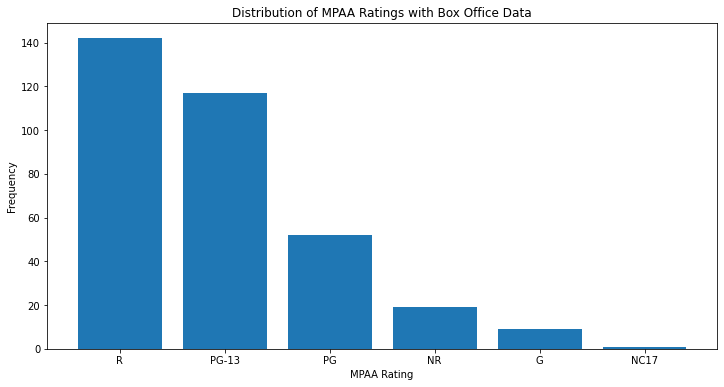

In [83]:
fig, ax = plt.subplots(figsize=(12, 6))

x = list(mpaa_ratings_bo['rating'].value_counts().index)
y = list(mpaa_ratings_bo['rating'].value_counts().values)

ax.bar(x, y)
ax.set_title('Distribution of MPAA Ratings with Box Office Data')
ax.set_xlabel('MPAA Rating')
ax.set_ylabel('Frequency');

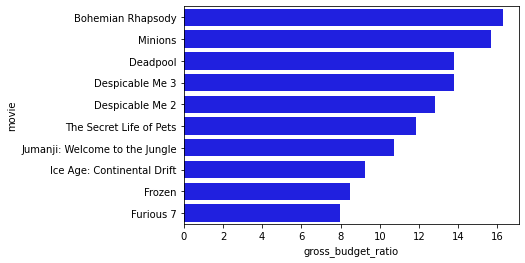

In [96]:
sns.barplot(data = df_top_ratio,
            x = 'gross_budget_ratio',
            y = 'movie',
            color = 'blue');

In [3]:
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t', index_col=0)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***